In [1]:
#coding=utf-8
#读取数据
import  pandas as pd
import numpy as np
import scipy as sp

train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')
submit = pd.read_csv('./data/submit_example.csv')
y = train_data['发电量']
X = train_data.drop(['ID','发电量'], axis=1)


### train数据 头信息，信息描述

In [2]:
#train_data.head()

In [3]:
#train_data.info()

In [4]:
#train_data.describe()

### test 数据 头信息，信息描述

In [177]:
#test_data.head()

In [178]:
#test_data.info()

In [179]:
#test_data.describe()

### submit 文件展示

In [8]:
#submit.head()

In [16]:
train_data.columns

Index(['ID', '板温', '现场温度', '光照强度', '转换效率', '转换效率A', '转换效率B', '转换效率C', '电压A',
       '电压B', '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C', '平均功率', '风速',
       '风向', '发电量'],
      dtype='object')

### 最初的版本 2018年7月25日 模仿葡萄酒项目的代码

In [118]:
# 2. Import libraries and modules
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
 
# 3. Load red wine data.
# dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# data = pd.read_csv(dataset_url, sep=';')

train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')
# 筛选重要性大于0.03的特征
# # train_data = train_data["电流A","功率A","平均功率","电流C","功率C","功率B","电流B","光照强度","板温","转换效率A","转换效率"]
# train_data = train_data.loc[:,['ID','电流A','功率A','平均功率','电流C','功率C','功率B','电流B','光照强度','板温','转换效率A','转换效率','发电量']] 
# test_data = test_data.loc[:,['ID','电流A','功率A','平均功率','电流C','功率C','功率B','电流B','光照强度','板温','转换效率A','转换效率']] 

# 4. Split data into training and test sets
y = train_data['发电量']
X = train_data.drop(['发电量','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                   )
 
# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=120))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['sqrt'],
                  'randomforestregressor__max_depth': [None]}
# hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
#                   'randomforestregressor__max_depth': [None, 5, 3, 1]} 
# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(X_train, y_train)
 
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
rmse = mean_squared_error(y_test, pred)
score = np.divide(1,1+rmse)
print(score)
# 10. Save model for future use
# joblib.dump(clf, 'rf_regressor.pkl')
# To load: clf2 = joblib.load('rf_regressor.pkl')

0.9982909055049781
0.020765103696203973
0.9796573142821857


## 用70%数据进行训练，30%数据进行测试

In [181]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')

#  Split data into training and test sets
y = train_data['发电量']
X = train_data.drop(['发电量','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                   )
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=70))
hyperparameters = { 'randomforestregressor__max_features' : ['sqrt'],
                  'randomforestregressor__max_depth': [None]}
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)
#  predict and score
pred = clf.predict(X_test)
print ("r2_score:",r2_score(y_test, pred))
print ("mean_squared_error:",mean_squared_error(y_test, pred))
rmse = mean_squared_error(y_test, pred)
score = np.divide(1,1+rmse)
print("score:",score)

r2_score: 0.9982953670805557
mean_squared_error: 0.020710896582562935
score: 0.9797093411543808


## 把全部的数据进行训练

In [176]:
# 2. Import libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')

# 4. Split data into training and test sets
y = train_data['发电量']
X = train_data.drop(['发电量','ID'], axis=1) 
clf = RandomForestRegressor(n_estimators=70,max_features="sqrt",max_depth=None)                          
clf.fit(X, y)

df_result = pd.DataFrame()
df_result['ID'] = list(test_data['ID'])
test_feature = test_data.drop('ID', axis=1)
pre = clf.predict(test_feature)
df_result['Score'] = pre
df_result.to_csv('result/submit_7_29_21_25.csv', index=False, header=False, float_format='%.8f')
print('done')

done


## 存储模型

In [183]:
# clf = joblib.dump(clf, 'model_save/rf_regressor_7_29_21_15.pkl')

# df_result = pd.DataFrame()
# df_result['ID'] = list(test_data['ID'])
# test_feature = test_data.drop('ID', axis=1)
# pre = clf.predict(test_feature)

# df_result['Score'] = pre
# df_result.to_csv('result/submit_7_29_21_15.csv', index=False, header=False, float_format='%.8f')


## 调参过程 发现 n_estimators = 70 效果最好

mean_squared_error: 0.021167794248658774
score: 0.9792709931042887
time used 0 s
--------------n_estimators=20------done---------------
mean_squared_error: 0.021434761624916733
score: 0.9790150458646837
time used 0 s
--------------n_estimators=30------done---------------
mean_squared_error: 0.02104546733031643
score: 0.979388315208584
time used 0 s
--------------n_estimators=40------done---------------
mean_squared_error: 0.01997257585768881
score: 0.9804185168009111
time used 0 s
--------------n_estimators=50------done---------------
mean_squared_error: 0.020059550529242628
score: 0.980334922094661
time used 0 s
--------------n_estimators=60------done---------------
mean_squared_error: 0.019264161154720558
score: 0.9810999327859263
time used 0 s
--------------n_estimators=70------done---------------
mean_squared_error: 0.019365792813375124
score: 0.9810021162668929
time used 1 s
--------------n_estimators=80------done---------------
mean_squared_error: 0.0193578212362632
score: 0.9810

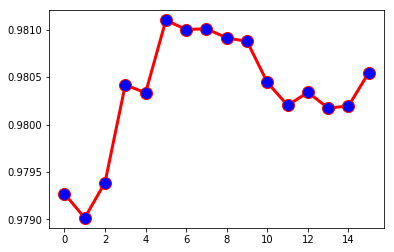

In [168]:
# 2. Import libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
import time
import matplotlib.pyplot as plt

train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')

# 4. Split data into training and test sets
y = train_data['发电量']
X = train_data.drop(['发电量','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                   )


# clf = RandomForestClassifier(n_estimators= 10 ,
#                                  random_state=0,
#                                  max_depth=None,
#                                  max_features=sqrt)
scores = []
# for nt in [10, 20, 40, 80, 120, 160, 200, 300, 400, 500, 600, 700, 800]:
for nt in [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 200]:
    t1 = time.time()
    forest = RandomForestRegressor(n_estimators=nt, random_state=123, max_features='sqrt',max_depth=None)
    forest.fit(X_train, y_train)
    pred = forest.predict(X_test)    
    print ("mean_squared_error:",mean_squared_error(y_test, pred))
    rmse = mean_squared_error(y_test, pred)
    score = np.divide(1,1+rmse)
    scores.append(score)
    print("score:",score)
    t2 = time.time() 
    print('time used %d s' % (t2-t1))
    print("--------------n_estimators=%d------done---------------"% nt)
print('everything has done')

x1 = np.arange(16) 
y1 = scores
plt.plot(x1,y1,label='Frist line',linewidth=3,color='r',marker='o', 
markerfacecolor='blue',markersize=12) 
# plt.plot(x2,y2,label='second line') 
# plt.xlabel('Plot Number') 
# plt.ylabel('Important var') 
# plt.title('Interesting Graph\nCheck it out') 
# plt.legend() 
plt.show() 


### 将test_data的训练数据输入模型，计算出结果，并保存

In [8]:
clf = joblib.load("rf_regressor.pkl")

df_result = pd.DataFrame()
df_result['ID'] = list(test_data['ID'])
test_feature = test_data.drop('ID', axis=1)
pre = clf.predict(test_feature)

df_result['Score'] = pre
df_result.to_csv('result/submit.csv', index=False, header=False, float_format='%.8f')


测试输出的结果

0.9979879496067704

0.024322814919608308

['rf_regressor.pkl']


In [ ]:
# 判断重复数据
isDuplicated = df.duplicated() # 判断重复数据记录
print (isDuplicated) # 打印输出

# 删除重复值
new_df1 = df.drop_duplicates() # 删除数据记录中所有列值相同的记录
new_df2 = df.drop_duplicates(['col1']) # 删除数据记录中col1值相同的记录
new_df3 = df.drop_duplicates(['col2']) # 删除数据记录中col2值相同的记录
new_df4 = df.drop_duplicates(['col1', 'col2']) # 删除数据记录中指定列（col1/col2）值相同的记录
print (new_df1) # 打印输出
print (new_df2) # 打印输出
print (new_df3) # 打印输出
print (new_df4) # 打印输出

In [ ]:
train_data.drop_duplicates(train_data.columns.drop('ID'), keep='first', inplace=True) #McDonald

## 2018年7月28号晚上23点34分 modle 完整版

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from sklearn.metrics import mean_squared_error
# 3. Load red wine data.
# dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# data = pd.read_csv(dataset_url, sep=';')

train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')
submit = pd.read_csv('./data/submit_example.csv') 


# ["电流A","功率A","平均功率","电流C","功率C","功率B","电流B","光照强度","板温","转换效率A","转换效率"]

# 数据预处理
train_data.drop_duplicates(train_data.columns.drop('ID'), keep='first', inplace=True) #McDonald

# 4. Split data into training and test sets
y = train_data['发电量']
X = train_data.drop(['ID','发电量'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                   )
clf = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_features="sqrt",max_depth=None)
# clf = Pipeline([('sc', StandardScaler()),
#                     ('pca', PCA(n_components=15)),
#                     ('clf', RandomForestRegressor(n_estimators=100,n_jobs=-1,max_features="sqrt",max_depth=None))
#                     ])
# clf = Pipeline([
#                     ('clf', RandomForestRegressor(n_estimators=100,n_jobs=-1,max_features="sqrt",max_depth=None))
#                     ])
clf.fit(X_train, y_train)
# 输出 feature_importances_
# importances = clf.feature_importances_.reshape(1,19)
# print(importances)
# indices = np.argsort(importances)[::-1]
# print(indices)
# 特征重要程度 feature_importances_  源代码链接 https://blog.csdn.net/zjuPeco/article/details/77371645
columns = ['板温', '现场温度', '光照强度', '转换效率', '转换效率A', '转换效率B', '转换效率C', '电压A', '电压B',
       '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C', '平均功率', '风速', '风向']
importances = clf.feature_importances_
importances


# 3. Load red wine data.
# dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# data = pd.read_csv(dataset_url, sep=';')

train_data = pd.read_csv('./data/public.train.csv')
test_data = pd.read_csv('./data/public.test.csv')
# 筛选重要性大于0.03的特征
# # train_data = train_data["电流A","功率A","平均功率","电流C","功率C","功率B","电流B","光照强度","板温","转换效率A","转换效率"]
# train_data = train_data.loc[:,['ID','电流A','功率A','平均功率','电流C','功率C','功率B','电流B','光照强度','板温','转换效率A','转换效率','发电量']] 
# test_data = test_data.loc[:,['ID','电流A','功率A','平均功率','电流C','功率C','功率B','电流B','光照强度','板温','转换效率A','转换效率']] 

# 4. Split data into training and test sets
y = train_data['发电量']
X = train_data.drop(['发电量','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                   )
 
# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=120,criterion='mse'))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['sqrt'],
                  'randomforestregressor__max_depth': [None]}
# hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
#                   'randomforestregressor__max_depth': [None, 5, 3, 1]} 
# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(X_train, y_train)
 
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
rmse = mean_squared_error(y_test, pred)
score = np.divide(1,1+rmse)
print(score)
# 10. Save model for future use
# joblib.dump(clf, 'rf_regressor.pkl')
# To load: clf2 = joblib.load('rf_regressor.pkl')

array([1.06645131e-02, 4.47887309e-04, 3.61908551e-02, 3.09656819e-03,
       1.07584981e-03, 2.30645960e-03, 9.23041097e-04, 1.86623157e-03,
       2.30417062e-03, 1.28445588e-03, 1.63790599e-01, 5.30509387e-02,
       7.25319486e-02, 2.26361024e-01, 1.06291955e-01, 9.99480855e-02,
       2.17377339e-01, 1.94059916e-04, 2.94018985e-04])

## 特征重要程度进行排列

In [109]:
# 特征重要程度 feature_importances_  源代码链接 https://blog.csdn.net/zjuPeco/article/details/77371645
columns = ['板温', '现场温度', '光照强度', '转换效率', '转换效率A', '转换效率B', '转换效率C', '电压A', '电压B',
       '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C', '平均功率', '风速', '风向']
importances = clf.feature_importances_
importances

array([0.008287  , 0.00038528, 0.05253667, 0.00356549, 0.00731454,
       0.00140389, 0.00100807, 0.0009825 , 0.00273996, 0.00244518,
       0.20587684, 0.07147384, 0.05500201, 0.23034094, 0.07401908,
       0.13295327, 0.14905549, 0.00030832, 0.00030163])

In [73]:
# 特征重要程度 feature_importances_  源代码链接 https://blog.csdn.net/zjuPeco/article/details/77371645
columns = ['板温', '现场温度', '光照强度', '转换效率', '转换效率A', '转换效率B', '转换效率C', '电压A', '电压B',
       '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C', '平均功率', '风速', '风向']
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, columns[indices[f]], importances[indices[f]]))

 1) 电流A                            0.211348
 2) 功率A                            0.211118
 3) 平均功率                           0.175730
 4) 电流C                            0.114936
 5) 功率C                            0.096128
 6) 功率B                            0.075545
 7) 电流B                            0.064544
 8) 光照强度                           0.024749
 9) 板温                             0.008515
10) 转换效率A                          0.005944
11) 转换效率                           0.003134
12) 电压C                            0.002280
13) 电压B                            0.001547
14) 电压A                            0.001366
15) 转换效率B                          0.001059
16) 转换效率C                          0.001048
17) 现场温度                           0.000474
18) 风向                             0.000274
19) 风速                             0.000258


 ## 保存 模型 和 结果

In [ ]:
y_pred = clf.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_pred, y_test))

#10. Save model for future use
joblib.dump(clf, './model_save/rf_regressor_7_29_10_12.pkl')

#predict and get result

df_result = pd.DataFrame()
df_result['ID'] = list(test_data['ID'])
test_feature = test_data.drop('ID', axis=1)
pre = clf.predict(test_feature)

df_result['Score'] = pre
df_result.to_csv('result/submit_7_29_10_12.csv', index=False, header=False, float_format='%.8f')
print('done')

In [ ]:
mean_squared_error: 0.019680305533484464 #加入McDonald的去重复数据

In [ ]:
mean_squared_error: 0.023065020042139842

### 纯RandomForestRegressor 无标准化
0.02040348248160798
```
clf = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_features="sqrt",max_depth=None)
```

### 没有pca的代码
0.022231228381953298
```
clf = Pipeline([('sc', StandardScaler()),
#                     ('pca', PCA(n_components=15)),
                    ('clf', RandomForestRegressor(n_estimators=100,n_jobs=-1,max_features="sqrt",max_depth=None))
                    ])
```

### 标准化+PCA_15+RandomForestRegressor
0.05047384637691991 
```
clf = Pipeline([('sc', StandardScaler()),
                    ('pca', PCA(n_components=15)),
                    ('clf', RandomForestRegressor(n_estimators=100,n_jobs=-1,max_features="sqrt",max_depth=None))
                    ])
```

clf.best_params_

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}
